# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
import sys
!{sys.executable} -m pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys_copy import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
       city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
       city_lat = city_weather["coord"]["lat"]
       city_lng = city_weather["coord"]["lon"]
       city_max_temp = city_weather["main"]["temp_max"]
       city_humidity = city_weather["main"]["humidity"]
       city_clouds = city_weather["clouds"]["all"]
       city_wind = city_weather["wind"]["speed"]
       city_country = city_weather["sys"]["country"]
       city_date = city_weather["dt"]

        # Append the City information into city_data list
       city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mossel bay
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | udachny
Processing Record 4 of Set 1 | illizi
Processing Record 5 of Set 1 | nasrullahganj
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | lipovtsy
Processing Record 12 of Set 1 | kudat
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | lae
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | gereida
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | usogorsk
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | petropavlovsk-ka

Processing Record 35 of Set 4 | okoneshnikovo
Processing Record 36 of Set 4 | piton saint-leu
Processing Record 37 of Set 4 | aracati
Processing Record 38 of Set 4 | marovoay
Processing Record 39 of Set 4 | lompoc
Processing Record 40 of Set 4 | hegang
Processing Record 41 of Set 4 | tianshui
Processing Record 42 of Set 4 | sisimiut
Processing Record 43 of Set 4 | kiffa
Processing Record 44 of Set 4 | santana
Processing Record 45 of Set 4 | eureka
Processing Record 46 of Set 4 | wailua homesteads
Processing Record 47 of Set 4 | whitehorse
Processing Record 48 of Set 4 | katsuren-haebaru
Processing Record 49 of Set 4 | port macquarie
Processing Record 0 of Set 5 | ouani
Processing Record 1 of Set 5 | ampara
Processing Record 2 of Set 5 | chibougamau
Processing Record 3 of Set 5 | dagda
Processing Record 4 of Set 5 | benjamin constant
Processing Record 5 of Set 5 | enewetak
Processing Record 6 of Set 5 | argo
Processing Record 7 of Set 5 | cabo san lucas
Processing Record 8 of Set 5 | ca

Processing Record 27 of Set 8 | ayaguz
City not found. Skipping...
Processing Record 28 of Set 8 | tazovsky
Processing Record 29 of Set 8 | howrah
Processing Record 30 of Set 8 | thunder bay
Processing Record 31 of Set 8 | qamdo
Processing Record 32 of Set 8 | boyolangu
Processing Record 33 of Set 8 | meulaboh
Processing Record 34 of Set 8 | sandakan
Processing Record 35 of Set 8 | charters towers
Processing Record 36 of Set 8 | renk
City not found. Skipping...
Processing Record 37 of Set 8 | taro
Processing Record 38 of Set 8 | tazacorte
Processing Record 39 of Set 8 | vernon
Processing Record 40 of Set 8 | itanhaem
Processing Record 41 of Set 8 | bikenibeu village
Processing Record 42 of Set 8 | ponciano arriaga
City not found. Skipping...
Processing Record 43 of Set 8 | palikir - national government center
Processing Record 44 of Set 8 | linqiong
Processing Record 45 of Set 8 | pisco
Processing Record 46 of Set 8 | lagos
Processing Record 47 of Set 8 | zaragoza
Processing Record 48 

Processing Record 10 of Set 12 | ciudad lazaro cardenas
Processing Record 11 of Set 12 | gorontalo
Processing Record 12 of Set 12 | hovd
Processing Record 13 of Set 12 | ongjin
Processing Record 14 of Set 12 | eregli
Processing Record 15 of Set 12 | miquelon
Processing Record 16 of Set 12 | shalya
Processing Record 17 of Set 12 | page
Processing Record 18 of Set 12 | seogwipo
City not found. Skipping...
Processing Record 19 of Set 12 | hengchun
Processing Record 20 of Set 12 | lezhe
Processing Record 21 of Set 12 | northam
Processing Record 22 of Set 12 | bijar
Processing Record 23 of Set 12 | pachino
Processing Record 24 of Set 12 | kovrov
Processing Record 25 of Set 12 | chernushka
Processing Record 26 of Set 12 | timbuktu
Processing Record 27 of Set 12 | pontes e lacerda
Processing Record 28 of Set 12 | levuka
Processing Record 29 of Set 12 | yuzhno-kurilsk
Processing Record 30 of Set 12 | kataragama
City not found. Skipping...
Processing Record 31 of Set 12 | baukau
Processing Reco

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mossel bay,-34.1831,22.1460,10.65,59,0,1.61,ZA,1690250590
1,invercargill,-46.4000,168.3500,8.35,82,65,8.14,NZ,1690250591
2,udachny,66.4167,112.4000,18.43,54,70,3.07,RU,1690250592
3,illizi,26.4833,8.4667,29.89,12,0,3.12,DZ,1690250593
4,nasrullahganj,22.6833,77.2667,26.18,90,92,2.83,IN,1690250595


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mossel bay,-34.1831,22.1460,10.65,59,0,1.61,ZA,1690250590
1,invercargill,-46.4000,168.3500,8.35,82,65,8.14,NZ,1690250591
2,udachny,66.4167,112.4000,18.43,54,70,3.07,RU,1690250592
3,illizi,26.4833,8.4667,29.89,12,0,3.12,DZ,1690250593
4,nasrullahganj,22.6833,77.2667,26.18,90,92,2.83,IN,1690250595


# Create the Scatter Plots Requested

#### Latitude Vs. Temperature

FileNotFoundError: [Errno 2] No such file or directory: '../output_data/Fig1.png'

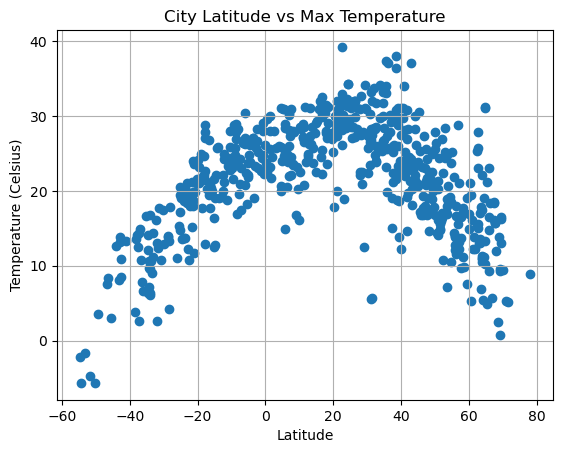

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

# Latitude Vs. Humidity

FileNotFoundError: [Errno 2] No such file or directory: '../output_data/Fig2.png'

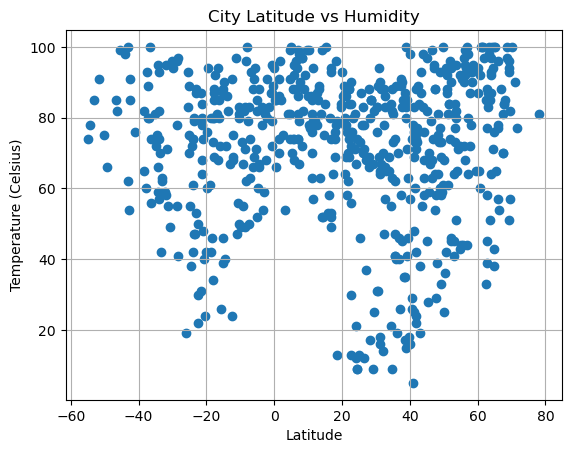

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

# Latitude Vs. Cloudiness

FileNotFoundError: [Errno 2] No such file or directory: '../output_data/Fig3.png'

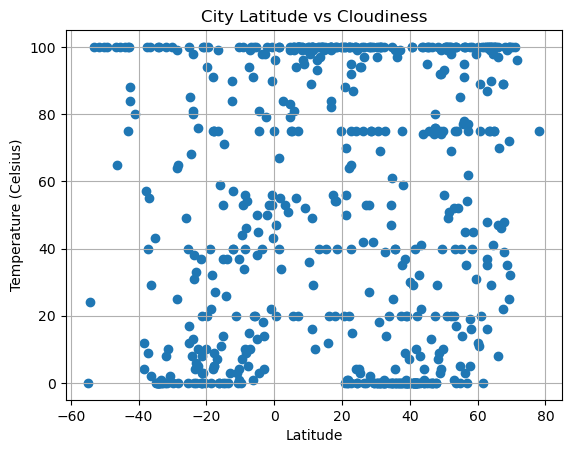

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: '../output_data/Fig4.png'

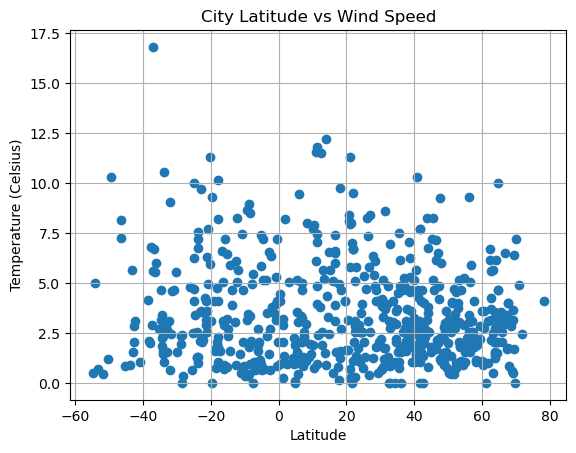

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship


The r-value is:0.12366203539163606


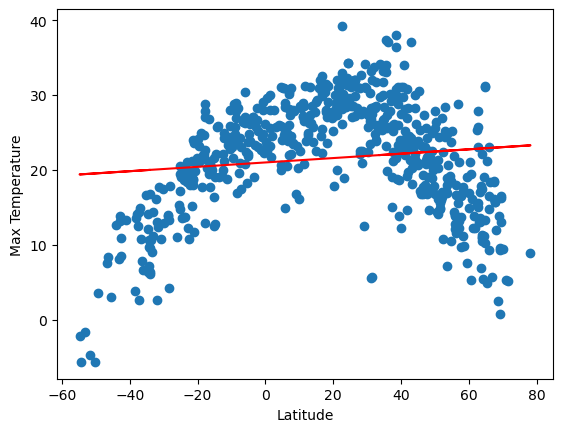

In [15]:
# Define a function to create Linear Regression plots
#####LAT VS MAX TEMP#######
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.009457489730702777


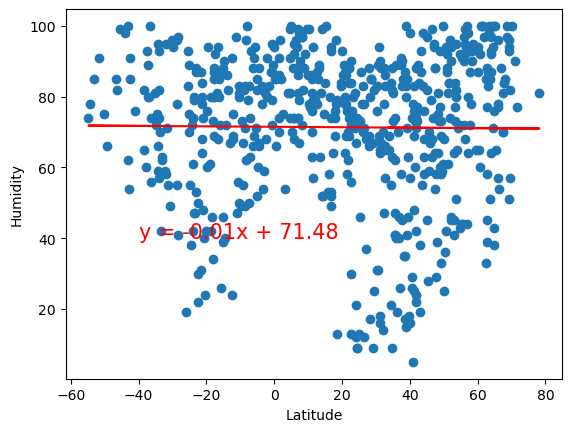

In [16]:
# Define a function to create Linear Regression plots
#####LAT VS Humidity#######
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.09586151167378303


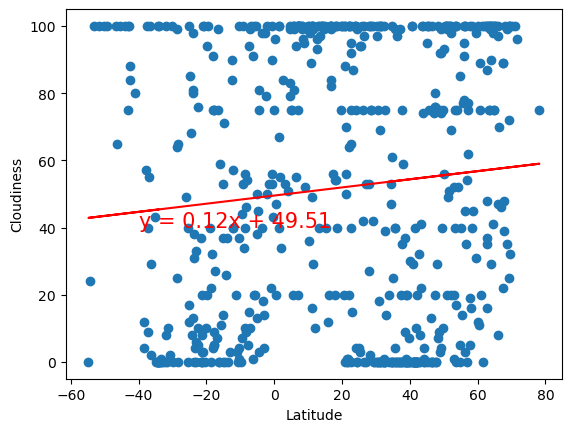

In [17]:
# Define a function to create Linear Regression plots
#####LAT VS Cloudiness#######
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.10165681631456881


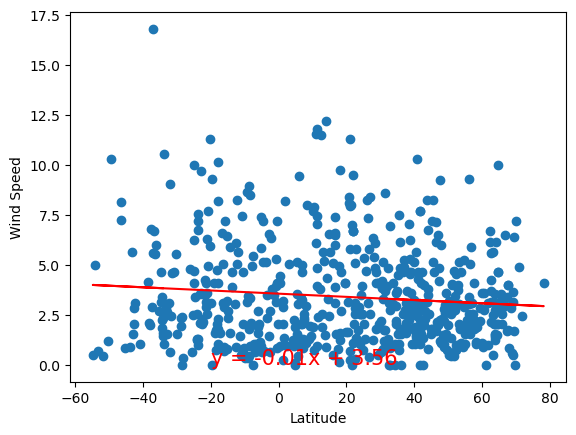

In [18]:
# Define a function to create Linear Regression plots
#####LAT VS Wind Speed#######
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,-0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,udachny,66.4167,112.4000,18.43,54,70,3.07,RU,1690250592
3,illizi,26.4833,8.4667,29.89,12,0,3.12,DZ,1690250593
4,nasrullahganj,22.6833,77.2667,26.18,90,92,2.83,IN,1690250595
10,lipovtsy,44.2014,131.7244,28.22,63,1,3.52,RU,1690250602
11,kudat,6.8837,116.8477,30.16,74,20,4.63,MY,1690250603


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mossel bay,-34.1831,22.1460,10.65,59,0,1.61,ZA,1690250590
1,invercargill,-46.4000,168.3500,8.35,82,65,8.14,NZ,1690250591
5,blackmans bay,-43.0167,147.3167,13.18,62,100,1.53,AU,1690250596
6,waitangi,-43.9535,-176.5597,12.68,98,100,0.89,NZ,1690250597
7,port elizabeth,-33.9180,25.5701,6.16,93,0,1.03,ZA,1690250505


#  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.6059424910552053


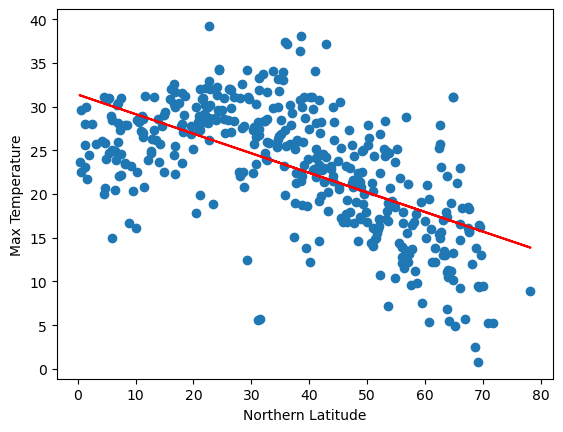

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

In [ ]:
# Discussion about the linear relationship: The r-value of -0.86 suggests that there is a strong correlation between latitude and max temp in the northern hemisphere

# Humidity vs. Latitude Linear Regression Plot

The r-value is:0.8473089129156745


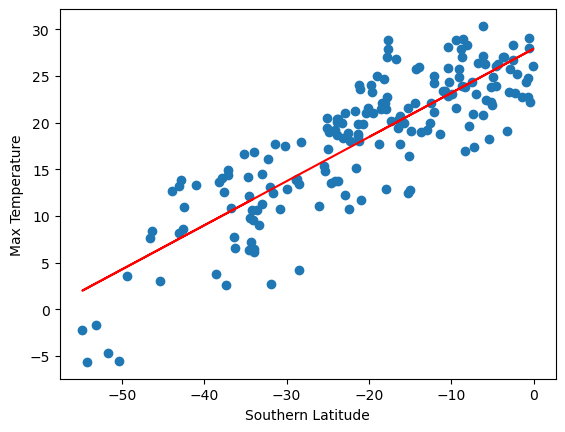

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,295),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

In [ ]:
3 Discussion about the linear relationship: the r-value of 0.310 suggests that there is a weak positive correlation between latitude and humidity in the southern hemisphere

# Cloudiness vs. Latitude Linear Regression Plot

The r-value is:-0.08620993596954757


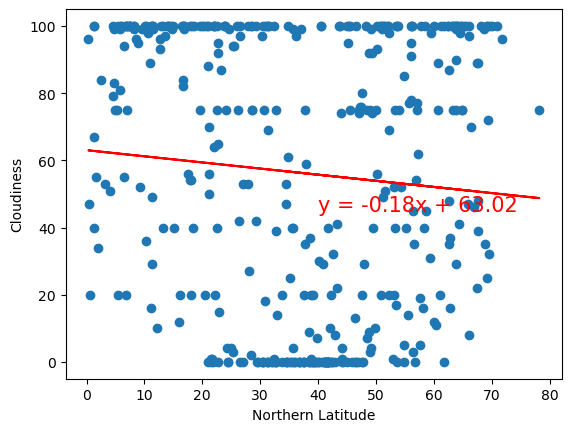

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

In [ ]:
# Discussion about the linear relationship: the r-value of 0.218 suggests that there is not a strong positive correlation between latitude and cloudiness in the northern hemisphere

The r-value is:-0.044279243266636834


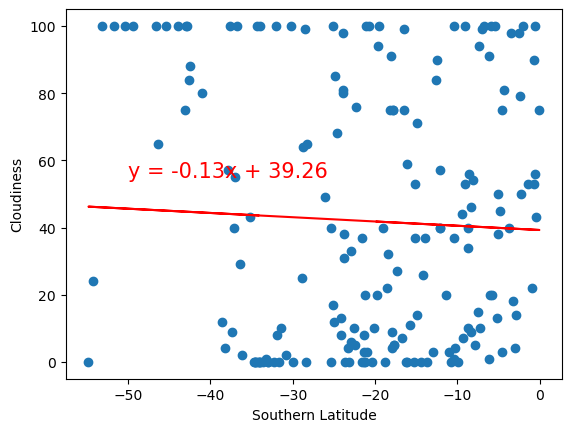

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

In [ ]:
# Discussion about the linear relationship: the r-value of 0.422 suggests that there is moderate positive correlation between latitude and cloudiness in the southern hemisphere



# Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.11526116964118628


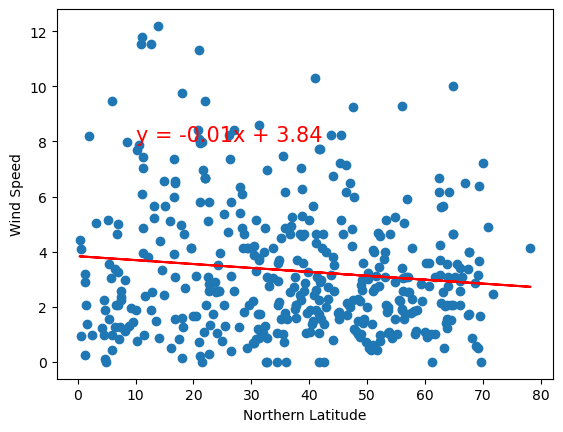

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

In [ ]:
# Discussion about the linear relationship: the r-value of 0.011 suggests that there is almost no correlation between latitude and wind speed in the northern hemisphere

The r-value is:-0.0444929601071724


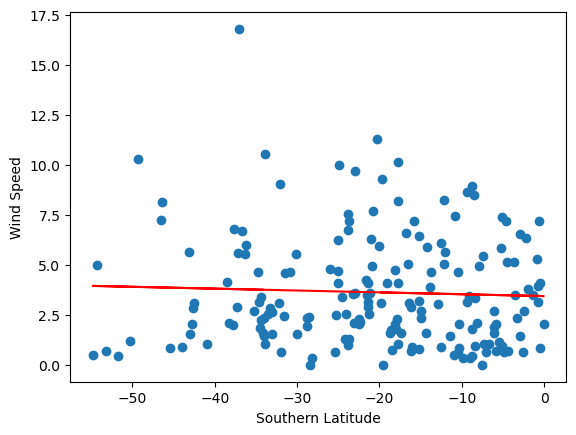

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

In [ ]:
# Discussion about the linear relationship: the r-value of -0.190 suggests that there is a weak negative correlation between latitude and wind speed in the southern hemisphere